In [1]:
!pip install stockstats
!pip install mplfinance

     |████████████████████████████████| 61kB 2.7MB/s 


In [2]:
import urllib
import time
import pytz
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import stockstats
import mplfinance as mpf


from datetime import datetime
from pandas_datareader import data
from stockstats import StockDataFrame
from mplfinance.original_flavor import candlestick_ohlc
# from mpl_finance import candlestick_ohlc

In [3]:
now = datetime.now()
current_time = now.strftime('%Y-%m-%d %H:%M:%S')
print("Current Time:", current_time)

tz_Sydney = pytz.timezone('Australia/Sydney')
datetime_Sydney = datetime.now(tz_Sydney)
print("Sydney time:", datetime_Sydney.strftime("%Y-%m-%d %H:%M:%S"))


Current Time: 2020-10-20 12:05:33
Sydney time: 2020-10-20 12:05:33


In [4]:
stocks = ['SPY']
start_date = '2016-11-01'
end_date = '2020-09-30'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
rawDf = data.DataReader(stocks, 'yahoo', start_date, end_date)
rawDf.head(9)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2016-10-31,196.806595,212.550003,213.190002,212.360001,212.929993,61272500.0
2016-11-01,195.380661,211.009995,212.990005,209.600006,212.929993,122781800.0
2016-11-02,194.204712,209.740005,211.100006,209.229996,210.649994,103330800.0
2016-11-03,193.315811,208.779999,210.240005,208.460007,209.990005,88939300.0
2016-11-04,193.102814,208.550003,209.889999,208.380005,208.910004,109122100.0
2016-11-07,197.362137,213.149994,213.190002,208.550003,208.550003,109794900.0
2016-11-08,198.251022,214.110001,214.770004,212.380005,212.690002,106772100.0
2016-11-09,200.352905,216.380005,217.100006,212.339996,212.369995,258429000.0


In [6]:
# plt.scatter(stocks['priceChange'], stocks['rsi_12'])

TypeError: list indices must be integers or slices, not str

In [7]:
rawDf.columns = rawDf.columns.droplevel('Symbols')
rawDf.reset_index(inplace = True)
rawDf.head(10)

Attributes,Date,Adj Close,Close,High,Low,Open,Volume
0,2016-10-31,196.806595,212.550003,213.190002,212.360001,212.929993,61272500.0
1,2016-11-01,195.380661,211.009995,212.990005,209.600006,212.929993,122781800.0
2,2016-11-02,194.204712,209.740005,211.100006,209.229996,210.649994,103330800.0
3,2016-11-03,193.315811,208.779999,210.240005,208.460007,209.990005,88939300.0
4,2016-11-04,193.102814,208.550003,209.889999,208.380005,208.910004,109122100.0
5,2016-11-07,197.362137,213.149994,213.190002,208.550003,208.550003,109794900.0
6,2016-11-08,198.251022,214.110001,214.770004,212.380005,212.690002,106772100.0
7,2016-11-09,200.352905,216.380005,217.100006,212.339996,212.369995,258429000.0
8,2016-11-10,200.852905,216.919998,218.309998,215.220001,217.300003,172113300.0
9,2016-11-11,200.389908,216.419998,216.699997,215.320007,216.080002,100552700.0


In [8]:
rawDf.columns.name = None
rawDf.head(10)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2016-10-31,196.806595,212.550003,213.190002,212.360001,212.929993,61272500.0
1,2016-11-01,195.380661,211.009995,212.990005,209.600006,212.929993,122781800.0
2,2016-11-02,194.204712,209.740005,211.100006,209.229996,210.649994,103330800.0
3,2016-11-03,193.315811,208.779999,210.240005,208.460007,209.990005,88939300.0
4,2016-11-04,193.102814,208.550003,209.889999,208.380005,208.910004,109122100.0
5,2016-11-07,197.362137,213.149994,213.190002,208.550003,208.550003,109794900.0
6,2016-11-08,198.251022,214.110001,214.770004,212.380005,212.690002,106772100.0
7,2016-11-09,200.352905,216.380005,217.100006,212.339996,212.369995,258429000.0
8,2016-11-10,200.852905,216.919998,218.309998,215.220001,217.300003,172113300.0
9,2016-11-11,200.389908,216.419998,216.699997,215.320007,216.080002,100552700.0


In [9]:
spDf = rawDf.copy()
spDf.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [10]:
# for i in range(0,spDf.shape[0]-2):
#     spDf.loc[spDf.index[i+2],'SMA_3'] = np.round(((spDf.iloc[i,2]+ spDf.iloc[i+1,2] +spDf.iloc[i+2,2])/3),1)
# for i in range(0,spDf.shape[0]-9):
#     spDf.loc[spDf.index[i+9],'SMA_10'] = np.round(((spDf.iloc[i,2]+ spDf.iloc[i+1,2] +spDf.iloc[i+2,2])/10),1)
# for i in range(0,spDf.shape[0]-59):
#     spDf.loc[spDf.index[i+59],'SMA_60'] = np.round(((spDf.iloc[i,2]+ spDf.iloc[i+1,2] +spDf.iloc[i+2,2])/60),1)
spDf['SMA3'] = spDf.rolling(3, win_type='triang').mean().Close
spDf['SMA5'] = spDf.rolling(5, win_type='triang').mean().Close
spDf['SMA10'] = spDf.rolling(10, win_type='triang').mean().Close
spDf['SMA30'] = spDf.rolling(30, win_type='triang').mean().Close
spDf['SMA60'] = spDf.rolling(60, win_type='triang').mean().Close

spDf.head(10)

,Date,Adj Close,Close,High,Low,Open,Volume,SMA3,SMA5,SMA10,SMA30,SMA60
0,2016-10-31,196.806595,212.550003,213.190002,212.360001,212.929993,61272500.0,NaN,NaN,NaN,NaN,NaN
1,2016-11-01,195.380661,211.009995,212.990005,209.600006,212.929993,122781800.0,NaN,NaN,NaN,NaN,NaN
2,2016-11-02,194.204712,209.740005,211.100006,209.229996,210.649994,103330800.0,211.077499,NaN,NaN,NaN,NaN
3,2016-11-03,193.315811,208.779999,210.240005,208.460007,209.990005,88939300.0,209.817501,NaN,NaN,NaN,NaN
4,2016-11-04,193.102814,208.550003,209.889999,208.380005,208.910004,109122100.0,208.962502,209.988890,NaN,NaN,NaN
5,2016-11-07,197.362137,213.149994,213.190002,208.550003,208.550003,109794900.0,209.757500,209.675556,NaN,NaN,NaN
6,2016-11-08,198.251022,214.110001,214.770004,212.380005,212.690002,106772100.0,212.239998,210.373333,NaN,NaN,NaN
7,2016-11-09,200.352905,216.380005,217.100006,212.339996,212.369995,258429000.0,214.437500,212.214444,NaN,NaN,NaN
8,2016-11-10,200.852905,216.919998,218.309998,215.220001,217.300003,172113300.0,215.947502,214.095556,NaN,NaN,NaN
9,2016-11-11,200.389908,216.419998,216.699997,215.320007,216.080002,100552700.0,216.660000,215.641112,211.9778,NaN,NaN


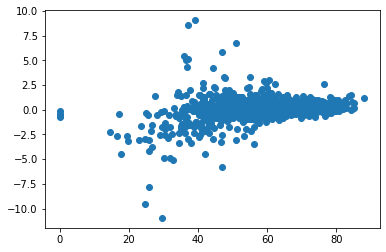

In [32]:
stocks = StockDataFrame.retype(spDf[["Open", "Close", "High", "Low", "Volume"]])

plt.scatter(stocks['rsi_12'],stocks['change'])

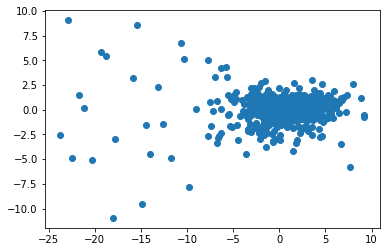

In [33]:
plt.scatter(stocks['macd'],stocks['change'])

In [30]:
stocks

,open,close,high,low,volume,close_3_ema,close_5_ema
0,212.929993,212.550003,213.190002,212.360001,61272500.0,212.550003,212.550003
1,212.929993,211.009995,212.990005,209.600006,122781800.0,211.523331,211.625998
2,210.649994,209.740005,211.100006,209.229996,103330800.0,210.504288,210.732633
3,209.990005,208.779999,210.240005,208.460007,88939300.0,209.584667,209.921539
4,208.910004,208.550003,209.889999,208.380005,109122100.0,209.050647,209.395025
...,...,...,...,...,...,...,...
981,321.220001,323.500000,326.799988,319.799988,76681300.0,325.005469,327.001925
982,322.579987,328.730011,329.579987,321.640015,71069400.0,326.867740,327.577954
983,333.220001,334.190002,334.959991,332.149994,64584600.0,330.528871,329.781970
984,333.970001,332.369995,334.769989,331.619995,51304000.0,331.449433,330.644645


In [10]:
stockData = spDf.copy()
stockData['Action'] = 0
stockData['Quantity'] = 0
stockData['Remaining'] = 1000000
stockData['Portfolio'] = stockData['Remaining'] + stockData['Quantity']*stockData['Close']
stockData['Index'] = 1000000
stockData['DailyReturnIndex'] = 0
stockData['DailyReturnPort1'] = 0
#indicators

stockData['ema3'] = stocks['close_3_ema']
stockData['ema5'] = stocks['close_5_ema']
stockData['ema10'] = stocks['close_10_ema']
stockData['ema20'] = stocks['close_20_ema']

## RSI
stockData['RSI'] = stocks['rsi_14']
stockData['RSI12'] = stocks['rsi_7']
stockData['RSI7'] = stocks['rsi_7']
# MACD
stockData['MACD'] = stocks['macd']
# MACD signal line
stockData['MACDS'] = stocks['macds']
# MACD histogram
stockData['MACDH'] = stocks['macdh']

# bolling
stockData['boll'] = stocks['boll']
stockData['boll_ub'] = stocks['boll_ub']
stockData['boll_lb'] = stocks['boll_lb']

stockData['delta'] = stocks.get('DELTA')
stockData.head(10)

DELTA not found.
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py", line 2891, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 70, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 101, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1675, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1683, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'DELTA'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/stockstats.py", line 1021, in __getitem__
    super(StockDataFrame, self).__getitem__(item))
  File "/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py", line 2902, in __getitem__
    indexer = self.columns.get_loc(key)
  File "

,Date,Adj Close,Close,High,Low,Open,Volume,SMA3,SMA5,SMA10,SMA30,SMA60,Action,Quantity,Remaining,Portfolio,Index,DailyReturnIndex,DailyReturnPort1,ema3,ema5,ema10,ema20,RSI,RSI12,RSI7,MACD,MACDS,MACDH,boll,boll_ub,boll_lb,delta
0,2016-11-01,57.084713,68.629997,69.370003,67.879997,69.129997,18824800.0,NaN,NaN,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,68.629997,68.629997,68.629997,68.629997,NaN,NaN,NaN,0.000000,0.000000,0.000000,68.629997,NaN,NaN,None
1,2016-11-02,56.452583,67.870003,68.220001,67.000000,67.980003,22983000.0,NaN,NaN,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,68.123334,68.174001,68.212000,68.231000,0.000000,0.000000,0.000000,-0.017051,-0.009473,-0.007578,68.250000,69.324795,67.175205,None
2,2016-11-03,56.677155,68.139999,68.260002,67.500000,67.870003,12748100.0,68.127501,NaN,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,68.132857,68.157895,68.183056,68.197585,27.671931,29.302218,29.302218,-0.013354,-0.011063,-0.002290,68.213333,68.983869,67.442797,None
3,2016-11-04,56.369396,67.769997,68.459999,67.360001,67.800003,17554100.0,67.980000,NaN,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,67.939332,67.996768,68.046972,68.074147,19.647975,19.954073,19.954073,-0.024704,-0.015684,-0.009020,68.102499,68.872151,67.332847,None
4,2016-11-07,57.583778,69.230003,69.269997,68.540001,68.540001,14799500.0,68.227499,68.173333,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,68.605485,68.470190,68.386588,68.353739,64.003326,67.575167,67.575167,0.027746,-0.002765,0.030511,68.328000,69.536836,67.119163,None
5,2016-11-08,57.658642,69.320000,69.709999,68.790001,68.889999,11208700.0,68.887501,68.360000,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,68.968413,68.780722,68.629027,68.557576,65.275764,68.905501,68.905501,0.062602,0.014953,0.047649,68.493333,69.844285,67.142381,None
6,2016-11-09,58.598553,70.449997,70.970001,68.750000,69.559998,25993800.0,69.580000,68.940000,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,69.715038,69.371738,69.067808,68.915386,76.505642,80.578204,80.578204,0.135068,0.045351,0.089717,68.772857,70.698636,66.847077,None
7,2016-11-10,58.848087,70.750000,71.279999,70.160004,70.400002,20634800.0,70.242498,69.537777,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,70.234548,69.849812,69.450515,69.232508,78.494169,82.601230,82.601230,0.195755,0.081496,0.114259,69.020000,71.285694,66.754305,None
8,2016-11-11,57.775097,69.459999,70.470001,68.889999,70.330002,17659700.0,70.352499,70.019999,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,69.846516,69.716404,69.452578,69.268999,56.392016,54.252097,54.252097,0.170800,0.102126,0.068674,69.068888,71.208454,66.929322,None
9,2016-11-14,58.099495,69.849998,69.919998,68.830002,69.209999,12572000.0,69.879999,70.137777,69.1882,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,69.848259,69.761722,69.536059,69.356492,60.054097,59.192009,59.192009,0.170701,0.117490,0.053210,69.146999,71.223814,67.070185,None


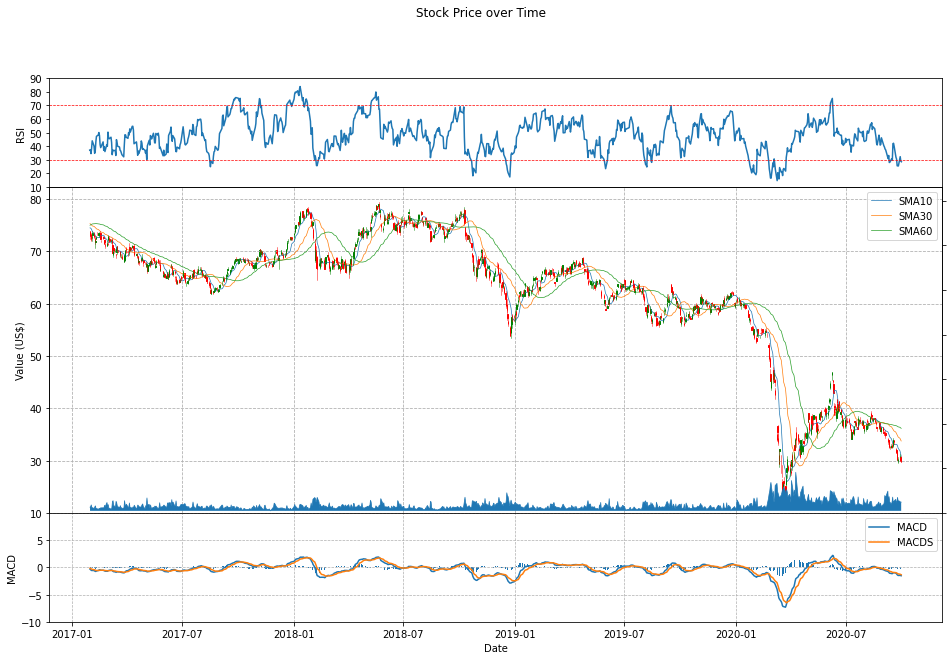

In [11]:

length = len(stockData)
candleArr = []
candleArr = stockData.loc[range(60,length),['Date','Open','High','Low','Close']]
# candleArr = candleArr.set_index('Date')

candleArr['Date'] = mdates.date2num(candleArr['Date'].values)
candleArr = candleArr.astype(float)
# x = 0
# while x < length:
#     appendLine = [mdates.date2num(candleArr['Date'][x].values),stockData['Open'][x],stockData['High'][x],stockData['Low'][x],stockData['Close'][x],stockData['Volume'][x]]
#     candleArr.append(appendLine)
#     x+=1

fig = plt.figure(figsize=(16, 10))
# fig,(ax1,ax2) = plt.subplots(2, sharex = True,figsize=(15, 10))



ax0 = plt.subplot2grid((5,4),(0,0), rowspan = 1, colspan = 4)
ax0.tick_params(axis='x')
ax0.tick_params(axis='y')
ax0.set_ylim(10,90)
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(8))
ax0.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['RSI'])
ax0.axhline(70, linestyle = 'dashed', linewidth = 0.7, color = 'r')
ax0.axhline(30, linestyle = 'dashed', linewidth = 0.7, color = 'r')
# ax0.axes.yaxis.set_ticklabels([])
plt.ylabel('RSI')

ax1 = plt.subplot2grid((5,4),(1,0), rowspan = 3, colspan = 4)
# ax1.set_ylim(0.9*stockData.loc[range(60,length)]['Close'].min(),stockData.loc[range(60,length)]['Close'].max())
# ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# ax1.spines['top']
# ax1.spines['left']
# ax1.spines['right']
# ax1.spines['bottom']
# ax1.tick_params(axis = 'y')
# ax1.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['Index'], label='Index')
# ax1.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['Portfolio'], label='Portfolio')
ax1.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['SMA10'], label='SMA10', linewidth=0.7)
ax1.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['SMA30'], label='SMA30', linewidth=0.7)
ax1.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['SMA60'], label='SMA60', linewidth=0.7)

# candlestick_ohlc(ax1, candleArr, width = 0.6, colorup = 'g', colordown = 'r')
candlestick_ohlc(ax1, candleArr.values, width = 0.6, colorup = 'g', colordown = 'r')

plt.ylabel('Value (US$)')
ax1.grid(True, linestyle='dashed')
ax1.legend()
volumeMin = stockData.loc[range(60,length)]['Volume'].min()


ax1v = ax1.twinx()
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0,8*stockData.loc[range(60,length)]['Volume'].max())
# ax2.bar(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['Volume'])
ax1v.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['Volume'], linewidth = 0.7)
ax1v.fill_between(stockData.loc[range(60,length)].Date,volumeMin, stockData.loc[range(60,length)]['Volume'])
ax1v.grid(False)

ax2 = plt.subplot2grid((5,4),(4,0), sharex = ax1, rowspan = 1, colspan = 4)
# ax2.axes.yaxis.set_ticklabels([])
ax2.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['MACD'], label = 'MACD')
ax2.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['MACDS'], label = 'MACDS')
ax2.bar(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['MACDH'])
# ax1v.fill_between(stockData.loc[range(60,length)].Date,0, stockData.loc[range(60,length)]['MACDH'])
ax2.set_ylim(-10,10)
ax2.legend()
ax2.grid(True, linestyle = 'dashed', linewidth = 0.7)

# ax2.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['Volume'], linewidth = 0.7)
# ax2.fill_between(stockData.loc[range(60,length)].Date,volumeMin, stockData.loc[range(60,length)]['Volume'], linewidth = 0.7)
# ax2.get_xaxis().set_visible(False)
# ax2.grid(True,axis='y', linestyle='dashed')
plt.ylabel('MACD')

# date_format = mpl_dates.DateFormatter('%d-%m-%Y')
# ax2.xaxis.set_major_formatter(date_format)

plt.setp(ax1.get_xticklabels(), visible = False)
plt.subplots_adjust(hspace = 0)

plt.xlabel('Date')
plt.suptitle('Stock Price over Time')

plt.show()

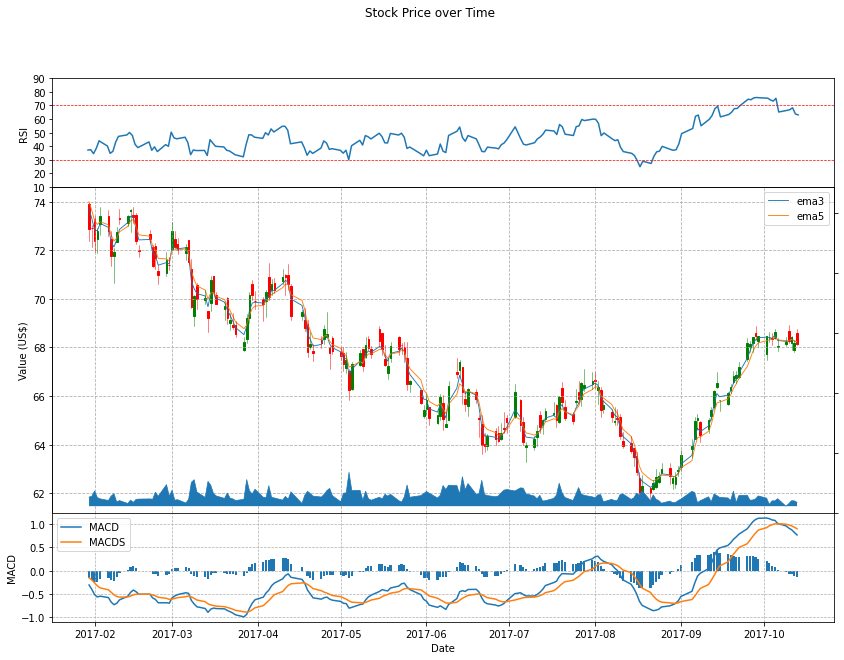

In [12]:

length = 240
candleArr = []
candleArr = stockData.loc[range(60,length),['Date','Open','High','Low','Close']]
# candleArr = candleArr.set_index('Date')

candleArr['Date'] = mdates.date2num(candleArr['Date'].values)
candleArr = candleArr.astype(float)
# x = 0
# while x < length:
#     appendLine = [mdates.date2num(candleArr['Date'][x].values),stockData['Open'][x],stockData['High'][x],stockData['Low'][x],stockData['Close'][x],stockData['Volume'][x]]
#     candleArr.append(appendLine)
#     x+=1

fig = plt.figure(figsize=(14, 10))
# fig,(ax1,ax2) = plt.subplots(2, sharex = True,figsize=(15, 10))



ax0 = plt.subplot2grid((5,4),(0,0), rowspan = 1, colspan = 4)
ax0.tick_params(axis='x')
ax0.tick_params(axis='y')
ax0.set_ylim(10,90)
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(8))
ax0.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['RSI'])
ax0.axhline(70, linestyle = 'dashed', linewidth = 0.7, color = 'r')
ax0.axhline(30, linestyle = 'dashed', linewidth = 0.7, color = 'r')
# ax0.axes.yaxis.set_ticklabels([])
plt.ylabel('RSI')

ax1 = plt.subplot2grid((5,4),(1,0), rowspan = 3, colspan = 4)
# ax1.set_ylim(0.9*stockData.loc[range(60,length)]['Close'].min(),stockData.loc[range(60,length)]['Close'].max())
# ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# ax1.spines['top']
# ax1.spines['left']
# ax1.spines['right']
# ax1.spines['bottom']
# ax1.tick_params(axis = 'y')
# ax1.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['Index'], label='Index')
# ax1.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['Portfolio'], label='Portfolio')
# ax1.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['tema5'], label='tema5', linewidth=0.9)
ax1.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['ema3'], label='ema3', linewidth=0.9)
ax1.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['ema5'], label='ema5', linewidth=0.9)
# ax1.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['tema10'], label='tema10', linewidth=0.9)

# candlestick_ohlc(ax1, candleArr, width = 0.6, colorup = 'g', colordown = 'r')
candlestick_ohlc(ax1, candleArr.values, width = 0.6, colorup = 'g', colordown = 'r')

plt.ylabel('Value (US$)')
ax1.grid(True, linestyle='dashed')
ax1.legend()
volumeMin = stockData.loc[range(60,length)]['Volume'].min()


ax1v = ax1.twinx()
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0,8*stockData.loc[range(60,length)]['Volume'].max())
# ax2.bar(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['Volume'])
ax1v.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['Volume'], linewidth = 0.7)
ax1v.fill_between(stockData.loc[range(60,length)].Date,volumeMin, stockData.loc[range(60,length)]['Volume'])
ax1v.grid(False)

ax2 = plt.subplot2grid((5,4),(4,0), sharex = ax1, rowspan = 1, colspan = 4)
# ax2.axes.yaxis.set_ticklabels([])
ax2.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['MACD'], label = 'MACD')
ax2.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['MACDS'], label = 'MACDS')
ax2.bar(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['MACDH'])
# ax1v.fill_between(stockData.loc[range(60,length)].Date,0, stockData.loc[range(60,length)]['MACDH'])
# ax2.set_ylim(-10,10)
ax2.legend()
ax2.grid(True, linestyle = 'dashed', linewidth = 0.7)

# ax2.plot(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['Volume'], linewidth = 0.7)
# ax2.fill_between(stockData.loc[range(60,length)].Date,volumeMin, stockData.loc[range(60,length)]['Volume'], linewidth = 0.7)
# ax2.get_xaxis().set_visible(False)
# ax2.grid(True,axis='y', linestyle='dashed')
plt.ylabel('MACD')

# date_format = mpl_dates.DateFormatter('%d-%m-%Y')
# ax2.xaxis.set_major_formatter(date_format)

plt.setp(ax1.get_xticklabels(), visible = False)
plt.subplots_adjust(hspace = 0)

plt.xlabel('Date')
plt.suptitle('Stock Price over Time')

plt.show()

In [13]:
## function to signal whether to buy sell

def buy_sell_row1(stockData, rowNum):
    flag = 0


    ## if shorter SMA crosses longer SMA from below, buy
    if stockData['SMA3'][rowNum-1] < stockData['SMA5'][rowNum-1] and stockData['SMA3'][rowNum] > stockData['SMA5'][rowNum]:
        flag = 1
    
    ## if shorter SMA crosses longer SMA from above, sell
    elif stockData['SMA3'][rowNum-1] > stockData['SMA10'][rowNum-1] and stockData['SMA3'][rowNum] < stockData['SMA10'][rowNum]:
        flag = 2

    ## if upward
    elif stockData['Close'][rowNum] > stockData['Close'][rowNum-1] and stockData['SMA3'][rowNum] > stockData['SMA30'][rowNum] and stockData['Quantity'][rowNum] == 0:
        flag = 1
    
    return (flag)

In [14]:
## function to signal whether to buy sell

def buy_sell_row2(stockData, rowNum):
    flag = 0
    rsiFlag = 0
    macdHistFlag = 0
    macdCross = 0
    ema3Flag = 0
    ema5Flag = 0
    ema10Flag = 0
    priceEmaFlag = 0
    remaining = stockData['Remaining'][rowNum]
    quantity = stockData['Quantity'][rowNum]

    ## getting the flags for RSI MACD and price
    if stockData['RSI'][rowNum] >= 70:
        rsiFlag = 1
    elif stockData['RSI'][rowNum] <= 30:
        rsiFlag = -1

    if stockData['MACDH'][rowNum] >= 0:
        macdHistFlag = 1
    # 1 for macd crossing macds from above
    if stockData['MACD'][rowNum-1] > stockData['MACDS'][rowNum-1] and stockData['MACD'][rowNum] <= stockData['MACDS'][rowNum]:
        macdCross = 1
    elif stockData['MACD'][rowNum-1] < stockData['MACDS'][rowNum-1] and stockData['MACD'][rowNum] >= stockData['MACDS'][rowNum]:
        macdCross = 2

    # 1 for macd crossing macds from above
    if stockData['MACD'][rowNum-1] > stockData['MACDS'][rowNum-1] and stockData['MACD'][rowNum] <= stockData['MACDS'][rowNum]:
        macdCross = 1
    elif stockData['MACD'][rowNum-1] < stockData['MACDS'][rowNum-1] and stockData['MACD'][rowNum] >= stockData['MACDS'][rowNum]:
        macdCross = 2
    
    # 1 for price crossing ema from above
    if stockData['ema3'][rowNum-1] > stockData['ema5'][rowNum-1] and stockData['ema3'][rowNum] <= stockData['ema5'][rowNum]:
        ema3Flag = 1
    elif stockData['ema3'][rowNum-1] < stockData['ema5'][rowNum-1] and stockData['ema3'][rowNum] >= stockData['ema5'][rowNum]:
        ema3Flag = 2
    # 1 for em3 crossing ema5 from above
    if stockData['ema3'][rowNum-1] > stockData['ema5'][rowNum-1] and stockData['ema3'][rowNum] <= stockData['ema5'][rowNum]:
        ema5Flag = 1
    elif stockData['ema3'][rowNum-1] < stockData['ema5'][rowNum-1] and stockData['ema3'][rowNum] >= stockData['ema5'][rowNum]:
        ema5Flag = 2
    # 1 for em3 crossing ema10 from above
    if stockData['ema3'][rowNum-1] > stockData['ema10'][rowNum-1] and stockData['ema3'][rowNum] <= stockData['ema10'][rowNum]:
        ema10Flag = 1
    elif stockData['ema3'][rowNum-1] < stockData['ema10'][rowNum-1] and stockData['ema3'][rowNum] >= stockData['ema10'][rowNum]:
        ema10Flag = 2
    # 1 for em3 crossing ema5 from above
    if stockData['Close'][rowNum-1] > stockData['ema10'][rowNum-1] and stockData['Close'][rowNum] <= stockData['ema10'][rowNum]:
        priceEmaFlag = 1
    elif stockData['Close'][rowNum-1] < stockData['ema10'][rowNum-1] and stockData['Close'][rowNum] >= stockData['ema10'][rowNum]:
        priceEmaFlag = 2

    ## only buying if remaining
    if remaining > 0:

        # more bold actions if oversold
        if rsiFlag == -1:
            if macdCross == 2 or ema5Flag == 2:
                flag = 1
        elif macdCross == 2 and stockData['Close'][rowNum] > stockData['ema3'][rowNum]:
            flag = 1
        elif ema3Flag == 2 and stockData['MACD'][rowNum] > stockData['MACDS'][rowNum]:
            flag = 1
        
        elif ema3Flag == 2 and stockData['Close'][rowNum] > stockData['ema5'][rowNum]:
            flag = 1

    ## only selling if positive holding
    if quantity > 0:
        if rsiFlag == 1:
            if macdCross == 1 or ema10Flag == 1:
                flag = 2
        elif macdCross == 1 and stockData['Close'][rowNum] < stockData['ema10'][rowNum]:
            flag = 2
        elif ema10Flag == 1 and stockData['MACD'][rowNum] < stockData['MACDS'][rowNum]:
            flag = 2
        elif ema10Flag == 1 and stockData['Close'][rowNum] < stockData['ema5'][rowNum]:
            flag = 2
        

    
    ## if everything trending upward with additional capital remaining (mostly for starting at upward)
    if flag == 0 and remaining > 0:
        if stockData['MACD'][rowNum] > stockData['MACDS'][rowNum] and stockData['Close'][rowNum] > stockData['ema3'][rowNum]:
            flag = 1

    return (flag)

In [15]:
def amount_row(stockData, rowNum, flag):
    ## return remaining capital if to buy
    if flag == 1:
        if stockData['Remaining'][rowNum] > 0:
            return stockData['Remaining'][rowNum]
        else:
            return 0
    
    ## return value of asset holdings if to sell
    elif flag == 2:
        if stockData['Quantity'][rowNum] > 0:
            return stockData['Quantity'][rowNum]*stockData['Close'][rowNum]
        else:
            return 0
    
    else:
        return 0
    

In [16]:
## looping through the data
start = 60

for i in range(start, len(stockData)):
    
    buySellSignal = buy_sell_row1(stockData, i-1)
    buySellQuantity = amount_row(stockData, i-1, buySellSignal)
    stockData['Action'][i] = buySellSignal
    # print(buySellSignal,buySellQuantity)

    if buySellSignal == 1:
        stockData['Quantity'][i] = stockData['Quantity'][i-1] + buySellQuantity/(stockData['Close'][i-1])
        stockData['Remaining'][i] = stockData['Remaining'][i-1] - buySellQuantity
        
    elif buySellSignal == 2: 
        stockData['Quantity'][i] = stockData['Quantity'][i-1] - buySellQuantity/(stockData['Close'][i-1])
        stockData['Remaining'][i] = stockData['Remaining'][i-1] + buySellQuantity

    ## otherwise hold
    else:
        stockData['Quantity'][i] =  stockData['Quantity'][i-1]
        stockData['Remaining'][i] =  stockData['Remaining'][i-1]
    
    
    stockData['Portfolio'][i] = stockData['Remaining'][i] + stockData['Quantity'][i]*stockData['Close'][i]

    stockData['DailyReturnIndex'][i] = stockData['Index'][i] - stockData['Index'][i-1]
    stockData['DailyReturnPort1'][i] = stockData['Portfolio'][i] - stockData['Portfolio'][i-1]

    ##index change for reference
    if i >= 60:
        stockData['Index'][i] = stockData['Close'][i]*stockData['Remaining'][59]/stockData['Close'][60]

stockData.head(11)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning:


A value is tryin

,Date,Adj Close,Close,High,Low,Open,Volume,SMA3,SMA5,SMA10,SMA30,SMA60,Action,Quantity,Remaining,Portfolio,Index,DailyReturnIndex,DailyReturnPort1,ema3,ema5,ema10,ema20,RSI,RSI12,RSI7,MACD,MACDS,MACDH,boll,boll_ub,boll_lb,delta
0,2016-11-01,57.084713,68.629997,69.370003,67.879997,69.129997,18824800.0,NaN,NaN,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,68.629997,68.629997,68.629997,68.629997,NaN,NaN,NaN,0.000000,0.000000,0.000000,68.629997,NaN,NaN,None
1,2016-11-02,56.452583,67.870003,68.220001,67.000000,67.980003,22983000.0,NaN,NaN,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,68.123334,68.174001,68.212000,68.231000,0.000000,0.000000,0.000000,-0.017051,-0.009473,-0.007578,68.250000,69.324795,67.175205,None
2,2016-11-03,56.677155,68.139999,68.260002,67.500000,67.870003,12748100.0,68.127501,NaN,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,68.132857,68.157895,68.183056,68.197585,27.671931,29.302218,29.302218,-0.013354,-0.011063,-0.002290,68.213333,68.983869,67.442797,None
3,2016-11-04,56.369396,67.769997,68.459999,67.360001,67.800003,17554100.0,67.980000,NaN,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,67.939332,67.996768,68.046972,68.074147,19.647975,19.954073,19.954073,-0.024704,-0.015684,-0.009020,68.102499,68.872151,67.332847,None
4,2016-11-07,57.583778,69.230003,69.269997,68.540001,68.540001,14799500.0,68.227499,68.173333,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,68.605485,68.470190,68.386588,68.353739,64.003326,67.575167,67.575167,0.027746,-0.002765,0.030511,68.328000,69.536836,67.119163,None
5,2016-11-08,57.658642,69.320000,69.709999,68.790001,68.889999,11208700.0,68.887501,68.360000,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,68.968413,68.780722,68.629027,68.557576,65.275764,68.905501,68.905501,0.062602,0.014953,0.047649,68.493333,69.844285,67.142381,None
6,2016-11-09,58.598553,70.449997,70.970001,68.750000,69.559998,25993800.0,69.580000,68.940000,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,69.715038,69.371738,69.067808,68.915386,76.505642,80.578204,80.578204,0.135068,0.045351,0.089717,68.772857,70.698636,66.847077,None
7,2016-11-10,58.848087,70.750000,71.279999,70.160004,70.400002,20634800.0,70.242498,69.537777,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,70.234548,69.849812,69.450515,69.232508,78.494169,82.601230,82.601230,0.195755,0.081496,0.114259,69.020000,71.285694,66.754305,None
8,2016-11-11,57.775097,69.459999,70.470001,68.889999,70.330002,17659700.0,70.352499,70.019999,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,69.846516,69.716404,69.452578,69.268999,56.392016,54.252097,54.252097,0.170800,0.102126,0.068674,69.068888,71.208454,66.929322,None
9,2016-11-14,58.099495,69.849998,69.919998,68.830002,69.209999,12572000.0,69.879999,70.137777,69.188200,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,69.848259,69.761722,69.536059,69.356492,60.054097,59.192009,59.192009,0.170701,0.117490,0.053210,69.146999,71.223814,67.070185,None


In [17]:
##view transanctions
# stockData[stockData['Action'] != 0]

stockData.iloc[60:138, :20]

,Date,Adj Close,Close,High,Low,Open,Volume,SMA3,SMA5,SMA10,SMA30,SMA60,Action,Quantity,Remaining,Portfolio,Index,DailyReturnIndex,DailyReturnPort1,ema3
60,2017-01-30,60.931892,72.870003,73.930000,72.360001,73.889999,13286400.0,74.085003,74.535556,74.439600,75.246022,74.938322,0,0,1000000,1000000.000000,1000000,0,0,73.699616
61,2017-01-31,60.956970,72.900002,73.019997,72.129997,72.910004,14007400.0,73.217503,74.033335,74.394400,75.136733,75.021416,2,0,1000000,1000000.000000,1000411,0,0,73.299809
62,2017-02-01,60.505436,72.360001,73.389999,71.910004,73.290001,18424300.0,72.757502,73.360002,74.264200,75.028355,75.090828,0,0,1000000,1000000.000000,993001,-411,0,72.829905
63,2017-02-02,60.848270,72.769997,72.900002,71.900002,72.480003,12880100.0,72.597500,72.906668,74.016801,74.919444,75.146739,0,0,1000000,1000000.000000,998627,6999,0,72.799951
64,2017-02-03,61.375057,73.400002,73.779999,72.629997,73.059998,11828600.0,72.824999,72.743334,73.699201,74.808978,75.190911,0,0,1000000,1000000.000000,1007273,1373,0,73.099976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2017-05-15,57.436337,68.279999,68.870003,68.059998,68.760002,13206900.0,67.940001,67.910002,67.514601,68.416955,69.576261,0,13502,0,921916.543518,937011,70263,7156,68.041143
134,2017-05-16,57.150333,67.940002,68.599998,67.699997,68.599998,11693400.0,68.062500,67.981112,67.658002,68.297844,69.514466,0,13502,0,917325.912964,932345,62989,-4590,67.990573
135,2017-05-17,56.586739,67.269997,68.120003,67.239998,67.540001,15606800.0,67.857500,67.941111,67.787802,68.180200,69.452394,0,13502,0,908279.494675,923150,67655,-9046,67.630285
136,2017-05-18,56.569904,67.250000,67.580002,66.720001,66.970001,14115000.0,67.432499,67.768889,67.839201,68.067489,69.389000,0,13502,0,908009.500000,922876,76850,-269,67.440142


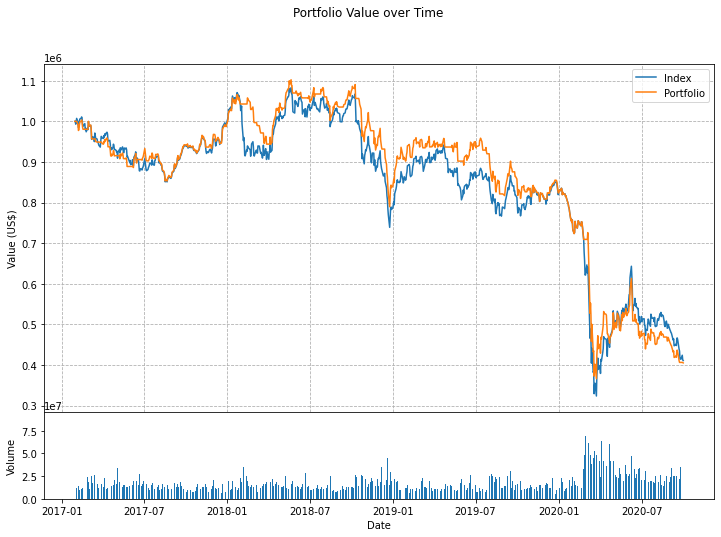

In [18]:
start = 60
length = len(stockData)

# x = 0
# while x < length:
#     appendLine = [mdates.date2num(candleArr['Date'][x].values),stockData['Open'][x],stockData['High'][x],stockData['Low'][x],stockData['Close'][x],stockData['Volume'][x]]
#     candleArr.append(appendLine)
#     x+=1

fig = plt.figure(figsize=(12, 8))
# fig,(ax1,ax2) = plt.subplots(2, sharex = True,figsize=(15, 10))
ax1 = plt.subplot2grid((5,4),(0,0), rowspan = 4, colspan = 4)

ax1.plot(stockData.loc[range(start,length)].Date, stockData.loc[range(start,length)]['Index'], label='Index')
ax1.plot(stockData.loc[range(start,length)].Date, stockData.loc[range(start,length)]['Portfolio'], label='Portfolio')


plt.ylabel('Value (US$)')
ax1.grid(True, linestyle='dashed')
ax1.legend()


ax2 = plt.subplot2grid((5,4),(4,0), sharex = ax1, rowspan = 1, colspan = 4)
ax2.bar(stockData.loc[range(start,length)].Date, stockData.loc[range(start,length)]['Volume'])
# ax2.get_xaxis().set_visible(False)
# ax2.grid(True,axis='y', linestyle='dashed')
plt.ylabel('Volume')

# date_format = mpl_dates.DateFormatter('%d-%m-%Y')
# ax2.xaxis.set_major_formatter(date_format)

plt.setp(ax1.get_xticklabels(), visible = False)
plt.subplots_adjust(hspace = 0)

plt.xlabel('Date')
plt.suptitle('Portfolio Value over Time')

plt.show()

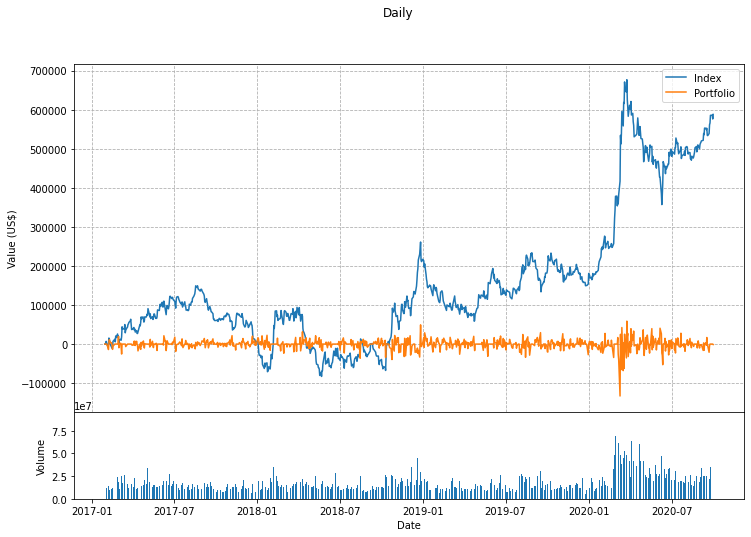

In [19]:
start = 60
length = len(stockData)

# x = 0
# while x < length:
#     appendLine = [mdates.date2num(candleArr['Date'][x].values),stockData['Open'][x],stockData['High'][x],stockData['Low'][x],stockData['Close'][x],stockData['Volume'][x]]
#     candleArr.append(appendLine)
#     x+=1

fig = plt.figure(figsize=(12, 8))
# fig,(ax1,ax2) = plt.subplots(2, sharex = True,figsize=(15, 10))
ax1 = plt.subplot2grid((5,4),(0,0), rowspan = 4, colspan = 4)

ax1.plot(stockData.loc[range(start,length)].Date, stockData.loc[range(start,length)]['DailyReturnIndex'], label='Index')
ax1.plot(stockData.loc[range(start,length)].Date, stockData.loc[range(start,length)]['DailyReturnPort1'], label='Portfolio')


plt.ylabel('Value (US$)')
ax1.grid(True, linestyle='dashed')
ax1.legend()


ax2 = plt.subplot2grid((5,4),(4,0), sharex = ax1, rowspan = 1, colspan = 4)
ax2.bar(stockData.loc[range(start,length)].Date, stockData.loc[range(start,length)]['Volume'])
# ax2.get_xaxis().set_visible(False)
# ax2.grid(True,axis='y', linestyle='dashed')
plt.ylabel('Volume')

# date_format = mpl_dates.DateFormatter('%d-%m-%Y')
# ax2.xaxis.set_major_formatter(date_format)

plt.setp(ax1.get_xticklabels(), visible = False)
plt.subplots_adjust(hspace = 0)

plt.xlabel('Date')
plt.suptitle('Daily')

plt.show()

In [20]:
stockData['DailyPercReturnIndex'] = stockData['DailyReturnIndex']/stockData['Portfolio']
stockData['DailyPercReturnPort1'] = stockData['DailyReturnPort1']/stockData['Index']
stockData.iloc[122:132]

,Date,Adj Close,Close,High,Low,Open,Volume,SMA3,SMA5,SMA10,SMA30,SMA60,Action,Quantity,Remaining,Portfolio,Index,DailyReturnIndex,DailyReturnPort1,ema3,ema5,ema10,ema20,RSI,RSI12,RSI7,MACD,MACDS,MACDH,boll,boll_ub,boll_lb,delta,DailyPercReturnIndex,DailyPercReturnPort1
122,2017-04-28,57.066208,67.839996,68.489998,67.739998,68.370003,14426000.0,67.990000,68.307777,68.218400,69.680955,70.380111,0,13493,0,915365.070587,930972,69714,674,67.990970,68.120121,68.447866,68.954565,38.112543,34.908313,34.908313,-0.636980,-0.535695,-0.101286,69.292500,71.563598,67.021401,None,0.076160,0.000724
123,2017-05-01,56.906391,67.650002,68.010002,67.500000,67.820000,9419400.0,67.779999,68.061111,68.198600,69.636133,70.297567,2,0,915365,915365.000000,928365,69028,0,67.820486,67.963414,68.302799,68.830321,36.924574,32.523674,32.523674,-0.662927,-0.561141,-0.101786,69.180000,71.545345,66.814654,None,0.075410,0.000000
124,2017-05-02,56.620384,67.309998,68.010002,67.029999,67.790001,16435600.0,67.612499,67.805555,68.165000,69.573444,70.216205,0,0,915365,915365.000000,923699,71635,0,67.565242,67.745609,68.122290,68.685528,34.832175,28.464102,28.464102,-0.702823,-0.589477,-0.113345,69.056499,71.544680,66.568319,None,0.078258,0.000000
125,2017-05-03,56.780212,67.500000,67.820000,66.970001,67.160004,16934800.0,67.442499,67.615555,68.067400,69.488844,70.136605,0,0,915365,915365.000000,926307,76301,0,67.532621,67.663739,68.009146,68.572620,36.981284,33.847413,33.847413,-0.710914,-0.613765,-0.097149,68.916999,71.426745,66.407254,None,0.083356,0.000000
126,2017-05-04,55.737133,66.260002,67.110001,65.830002,67.029999,33944500.0,67.142500,67.369999,67.910399,69.379977,70.057922,0,0,915365,915365.000000,909290,73693,0,66.896311,67.195827,67.691120,68.352370,30.022692,21.518118,21.518118,-0.808064,-0.652625,-0.155439,68.726500,71.438028,66.014971,None,0.080507,0.000000
127,2017-05-05,56.620384,67.309998,67.419998,66.269997,66.300003,18743800.0,66.832500,67.177778,67.717999,69.252644,69.979994,0,0,915365,915365.000000,923699,90710,0,67.103155,67.233884,67.621825,68.253096,40.271475,42.286527,42.286527,-0.791213,-0.680342,-0.110871,68.560500,71.186519,65.934481,None,0.099097,0.000000
128,2017-05-08,57.024151,67.790001,67.910004,67.239998,67.300003,18948700.0,67.167500,67.055556,67.527599,69.114088,69.904828,0,0,915365,915365.000000,930286,76301,0,67.446578,67.419256,67.652403,68.208992,44.288474,49.424540,49.424540,-0.730705,-0.690415,-0.040291,68.432000,70.935938,65.928061,None,0.083356,0.000000
129,2017-05-09,56.553093,67.230003,67.930000,67.029999,67.930000,10719700.0,67.530001,67.195556,67.378400,68.965044,69.833789,1,13502,0,907739.505325,922601,69714,-7625,67.338291,67.356172,67.575603,68.115754,40.837765,42.303196,42.303196,-0.719642,-0.696260,-0.023382,68.249000,70.520765,65.977235,None,0.076800,-0.008265
130,2017-05-10,57.301743,68.120003,68.440002,67.559998,67.620003,18259200.0,67.592503,67.425557,67.290000,68.815066,69.766722,0,13502,0,919756.277084,934815,77399,12016,67.729147,67.610782,67.674585,68.116159,47.798978,54.467587,54.467587,-0.631779,-0.683364,0.051585,68.110000,70.008296,66.211703,None,0.084152,0.012854
131,2017-05-11,57.183983,67.980003,68.480003,67.879997,68.360001,11968700.0,67.862503,67.644446,67.299800,68.673111,69.702122,0,13502,0,917866.005325,932894,65185,-1890,67.854575,67.733856,67.730115,68.103192,46.864845,52.438628,52.438628,-0.566908,-0.660073,0.093165,67.979000,69.472167,66.485833,None,0.071018,-0.002026


In [21]:
##Displaying outcome
indexPort = round(stockData['Close'][len(stockData)-1]*stockData['Remaining'][59]/stockData['Close'][59],2)
Portfolio1 = round(stockData['Portfolio'][len(stockData)-1],2)
Portfolio2 = round(stockData['Portfolio'][len(stockData)-1],2)
SharpeIndex = stockData['DailyPercReturnIndex'].mean()/stockData['DailyPercReturnIndex'].std()
SharpePort1 = stockData['DailyPercReturnPort1'].mean()/stockData['DailyPercReturnPort1'].std()

target = 0
stockData['DownReturnIndex'] = 0
stockData['DownReturnPort1'] = 0
stockData.loc[stockData['DailyPercReturnIndex'] < target, 'DownReturnIndex'] = stockData['DailyPercReturnIndex']**2
stockData.loc[stockData['DailyPercReturnPort1'] < target, 'DownReturnPort1'] = stockData['DailyPercReturnPort1']**2


sortinoIndex = (stockData['DailyPercReturnIndex'].mean())/np.sqrt(stockData['DownReturnIndex'].mean())
sortinoPort1 = (stockData['DailyPercReturnPort1'].mean())/np.sqrt(stockData['DownReturnPort1'].mean())

sIndex=(stockData['DailyPercReturnIndex']+1).cumprod()
sPort1=(stockData['DailyPercReturnPort1']+1).cumprod()
romadIndex = np.ptp(sIndex)/sIndex.max()
romadPort1 = np.ptp(sPort1)/sPort1.max()
romadIndex = (indexPort/1000000 - 1)/romadIndex
romadPort1 = (Portfolio1/1000000 - 1)/romadPort1

## Sharpe Sortino and RoMad are higher the better

print('Index Port Value: ' + str(indexPort) + ' | Profit: ' + "{:.3f}% | Sharpe: {:.3f} | Sortino {:.3f} | RoMaD {:.3f}".format(indexPort/10000 - 100, SharpeIndex*(252**0.5), sortinoIndex*(252**0.5), romadIndex))
print('Portfolio1 Value: ' + str(Portfolio1) + ' | Profit: ' + "{:.3f}% | Sharpe: {:.3f} | Sortino {:.3f} | RoMaD {:.3f}".format(Portfolio1/10000 - 100, SharpePort1*(252**0.5), sortinoPort1*(252**0.5), romadPort1))


Index Port Value: 403475.68 | Profit: -59.652% | Sharpe: 10.246 | Sortino 262.785 | RoMaD -0.597
Portfolio1 Value: 404983.91 | Profit: -59.502% | Sharpe: -0.878 | Sortino -1.057 | RoMaD -0.769


In [22]:
stockData2 = stockData.copy()
print('Index Port Value: ' + str(indexPort) + ' | Profit: ' + "{:.3f}% | Sharpe: {:.3f} | Sortino {:.3f} | RoMaD {:.3f}".format(indexPort/10000 - 100, SharpeIndex*(252**0.5), sortinoIndex*(252**0.5), romadIndex))
print('Portfolio1 Value: ' + str(Portfolio1) + ' | Profit: ' + "{:.3f}% | Sharpe: {:.3f} | Sortino {:.3f} | RoMaD {:.3f}".format(Portfolio1/10000 - 100, SharpePort1*(252**0.5), sortinoPort1*(252**0.5), romadPort1))
print(stockData2.head())

Index Port Value: 403475.68 | Profit: -59.652% | Sharpe: 10.246 | Sortino 262.785 | RoMaD -0.597
Portfolio1 Value: 404983.91 | Profit: -59.502% | Sharpe: -0.878 | Sortino -1.057 | RoMaD -0.769
        Date  Adj Close  ...  DownReturnIndex  DownReturnPort1
0 2016-11-01  57.084713  ...              0.0              0.0
1 2016-11-02  56.452583  ...              0.0              0.0
2 2016-11-03  56.677155  ...              0.0              0.0
3 2016-11-04  56.369396  ...              0.0              0.0
4 2016-11-07  57.583778  ...              0.0              0.0

[5 rows x 37 columns]


<Figure size 1080x720 with 0 Axes>

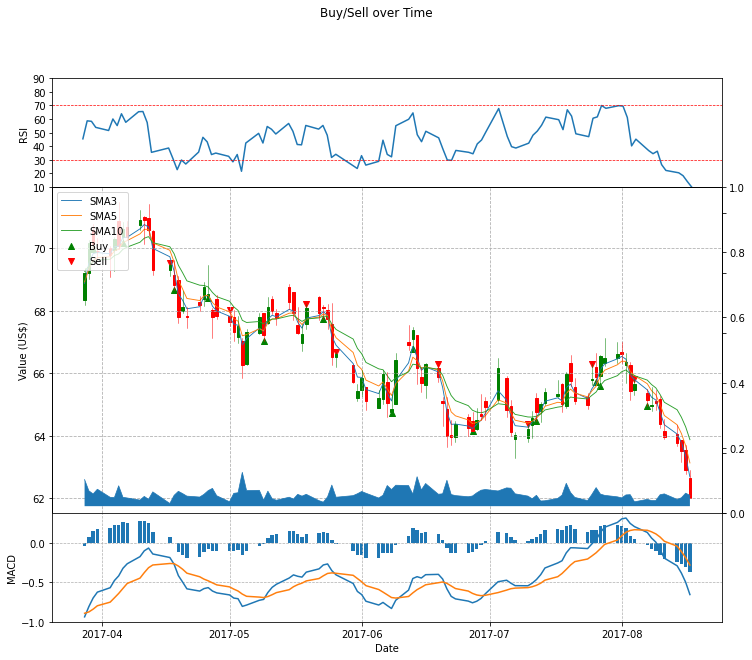

In [23]:

## view buy sell

plt.figure(figsize=(15, 10))
start = 100
end = 200
# len(stockData)-90
stockDataExtract = stockData.loc[range(start,end)]
stockDataBuy = []
stockDataSell = []
for i in range(start,end):
    if stockDataExtract['Action'][i] == 1:
        stockDataBuy.append(stockDataExtract['Low'][i])
        stockDataSell.append(np.nan)

    elif stockDataExtract['Action'][i] == 2:
        stockDataBuy.append(np.nan)
        stockDataSell.append(stockDataExtract['High'][i])

    else:
        stockDataBuy.append(np.nan)
        stockDataSell.append(np.nan)
# print(stockDataBuy)



length = len(stockDataExtract)
candleArr2 = []
candleArr2 = stockDataExtract.loc[:,['Date','Open','High','Low','Close']]
# candleArr = candleArr.set_index('Date')

candleArr2['Date'] = mdates.date2num(candleArr2['Date'].values)
candleArr2 = candleArr2.astype(float)
# x = 0
# while x < length:
#     appendLine = [mdates.date2num(candleArr['Date'][x].values),stockData['Open'][x],stockData['High'][x],stockData['Low'][x],stockData['Close'][x],stockData['Volume'][x]]
#     candleArr.append(appendLine)
#     x+=1

fig = plt.figure(figsize=(12, 10))
# fig,(ax1,ax2) = plt.subplots(2, sharex = True,figsize=(15, 10))



ax0 = plt.subplot2grid((5,4),(0,0), rowspan = 1, colspan = 4)
ax0.tick_params(axis='x')
ax0.tick_params(axis='y')
ax0.plot(stockDataExtract.Date, stockDataExtract['RSI12'])
ax0.set_ylim(10,90)
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(8))
ax0.axhline(70, linestyle = 'dashed', linewidth = 0.7, color = 'r')
ax0.axhline(30, linestyle = 'dashed', linewidth = 0.7, color = 'r')
# plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(prune='lower'))

plt.ylabel('RSI')

ax1 = plt.subplot2grid((5,4),(1,0), rowspan = 3, colspan = 4)
ax1.plot(stockDataExtract.Date, stockDataExtract['ema3'], label='SMA3', linewidth=0.9)
ax1.plot(stockDataExtract.Date, stockDataExtract['ema5'], label='SMA5', linewidth=0.9)
ax1.plot(stockDataExtract.Date, stockDataExtract['ema10'], label='SMA10', linewidth=0.9)
# ax1.plot(stockDataExtract.Date, stockDataExtract['SMA60'], label='SMA60', linewidth=0.7)

ax1.scatter(stockDataExtract.Date, stockDataBuy, label='Buy', marker = '^', color = 'green')
ax1.scatter(stockDataExtract.Date, stockDataSell, label='Sell', marker = 'v', color = 'red')

# candlestick_ohlc(ax1, candleArr, width = 0.6, colorup = 'g', colordown = 'r')
candlestick_ohlc(ax1, candleArr2.values, width = 0.6, colorup = 'g', colordown = 'r')

plt.ylabel('Value (US$)')
ax1.grid(True, linestyle='dashed')
ax1.legend(loc='upper left')

ax1v = ax1.twinx()
ax1v = ax1.twinx()
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0,8*stockDataExtract['Volume'].max())
# ax2.bar(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['Volume'])
ax1v.plot(stockDataExtract.Date, stockDataExtract['Volume'], linewidth = 0.7)
ax1v.fill_between(stockDataExtract.Date,volumeMin, stockDataExtract['Volume'])
ax1v.grid(False)


ax2 = plt.subplot2grid((5,4),(4,0), sharex = ax1, rowspan = 1, colspan = 4)
ax2.plot(stockDataExtract.Date, stockDataExtract['MACD'])
ax2.plot(stockDataExtract.Date, stockDataExtract['MACDS'])
ax2.bar(stockDataExtract.Date, stockDataExtract['MACDH'])
# ax2.set_ylim(stockDataExtract.min,10)
ax2.grid(True, linestyle = 'dashed', linewidth = 0.7)

plt.ylabel('MACD')

plt.setp(ax1.get_xticklabels(), visible = False)
plt.subplots_adjust(hspace = 0)

plt.xlabel('Date')
plt.suptitle('Buy/Sell over Time')

plt.show()

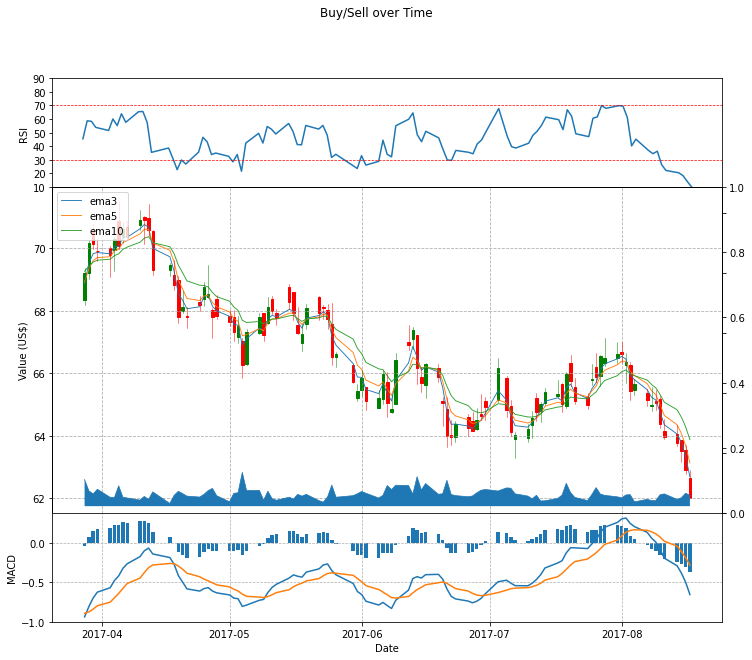

In [24]:

# x = 0
# while x < length:
#     appendLine = [mdates.date2num(candleArr['Date'][x].values),stockData['Open'][x],stockData['High'][x],stockData['Low'][x],stockData['Close'][x],stockData['Volume'][x]]
#     candleArr.append(appendLine)
#     x+=1

fig = plt.figure(figsize=(12, 10))
# fig,(ax1,ax2) = plt.subplots(2, sharex = True,figsize=(15, 10))



ax0 = plt.subplot2grid((5,4),(0,0), rowspan = 1, colspan = 4)
ax0.tick_params(axis='x')
ax0.tick_params(axis='y')
ax0.plot(stockDataExtract.Date, stockDataExtract['RSI12'])
ax0.set_ylim(10,90)
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(8))
ax0.axhline(70, linestyle = 'dashed', linewidth = 0.7, color = 'r')
ax0.axhline(30, linestyle = 'dashed', linewidth = 0.7, color = 'r')
# plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(prune='lower'))

plt.ylabel('RSI')

ax1 = plt.subplot2grid((5,4),(1,0), rowspan = 3, colspan = 4)
ax1.plot(stockDataExtract.Date, stockDataExtract['ema3'], label='ema3', linewidth=0.9)
ax1.plot(stockDataExtract.Date, stockDataExtract['ema5'], label='ema5', linewidth=0.9)
ax1.plot(stockDataExtract.Date, stockDataExtract['ema10'], label='ema10', linewidth=0.9)

# ax1.scatter(stockDataExtract.Date, stockDataBuy, label='Buy', marker = '^', color = 'green')
# ax1.scatter(stockDataExtract.Date, stockDataSell, label='Sell', marker = 'v', color = 'red')


# candlestick_ohlc(ax1, candleArr, width = 0.6, colorup = 'g', colordown = 'r')
candlestick_ohlc(ax1, candleArr2.values, width = 0.6, colorup = 'g', colordown = 'r')

plt.ylabel('Value (US$)')
ax1.grid(True, linestyle='dashed')
ax1.legend(loc='upper left')

ax1v = ax1.twinx()
ax1v = ax1.twinx()
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0,8*stockDataExtract['Volume'].max())
# ax2.bar(stockData.loc[range(60,length)].Date, stockData.loc[range(60,length)]['Volume'])
ax1v.plot(stockDataExtract.Date, stockDataExtract['Volume'], linewidth = 0.7)
ax1v.fill_between(stockDataExtract.Date,volumeMin, stockDataExtract['Volume'])
ax1v.grid(False)


ax2 = plt.subplot2grid((5,4),(4,0), sharex = ax1, rowspan = 1, colspan = 4)
ax2.plot(stockDataExtract.Date, stockDataExtract['MACD'])
ax2.plot(stockDataExtract.Date, stockDataExtract['MACDS'])
ax2.bar(stockDataExtract.Date, stockDataExtract['MACDH'])
# ax2.set_ylim(stockDataExtract.min,10)
ax2.grid(True, linestyle = 'dashed', linewidth = 0.7)

plt.ylabel('MACD')

plt.setp(ax1.get_xticklabels(), visible = False)
plt.subplots_adjust(hspace = 0)

plt.xlabel('Date')
plt.suptitle('Buy/Sell over Time')

plt.show()

In [25]:
candleArr2.head()


,Date,Open,High,Low,Close
100,736416.0,68.339996,69.379997,68.180000,69.209999
101,736417.0,69.199997,70.279999,69.010002,70.160004
102,736418.0,70.599998,70.769997,69.959999,70.139999
103,736419.0,69.910004,70.339996,69.580002,69.900002
104,736422.0,70.010002,70.059998,69.080002,69.779999
